In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
    

In [54]:
#url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
#names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
#dataset = pd.read_csv(url, names=names)
dataset =pd.read_csv(r'C:\Users\priyanka\Documents\test.csv')

In [55]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 3].values

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [57]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [58]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [59]:
y_pred = classifier.predict(X_test)


In [60]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[0 1 0]
 [0 0 0]
 [0 1 0]]
              precision    recall  f1-score   support

     Builder       0.00      0.00      0.00       1.0
  Programmer       0.00      0.00      0.00       0.0
   Scientist       0.00      0.00      0.00       1.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


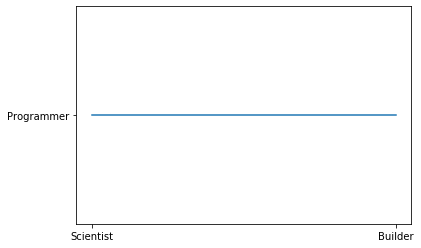

In [61]:
plt.plot(y_test,y_pred)

In [62]:
error = []
for i in range(1, 6):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

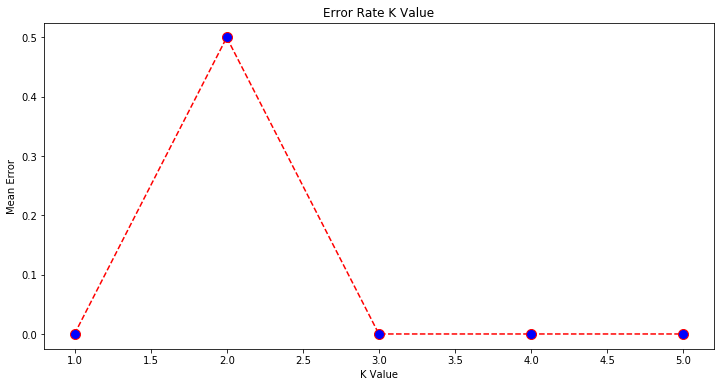

In [52]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 6), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')